#Introduction
This is a simple multiple regression using value relevance of accounting information. For this project, we are using Bank Mandiri (BMRI) as an example. We are trying to predict the Market Value per Share(MVPS) using several predictors (ROE, Revenue Growth, Book Value per Share, Dividend Yield and Price to Book Ratio.

Now we import the library

In [ ]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

# modelling
import statsmodels.api as smf

# statistics 
import scipy.stats as stats

In [13]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [47]:
BMRI = pd.read_csv("BMRI_centered_variables.csv")
BMRI.head()

,Date,MVPS,ROE,RevYoY,BVPS,Div,PBV,centered_ROE,centered_RevYoY,centered_BVPS,centered_Div,centered_PBV
0,12/31/2023,6050,22.4491,8.6603,2794.8513,5.6084,2.1647,6.505897,-1.502135,983.221778,2.149398,0.250018
1,9/30/2023,6025,21.7746,17.7238,2606.8879,4.6281,2.3112,5.831397,7.561365,795.258378,1.169097,0.396518
2,6/30/2023,5200,21.3087,17.7856,2475.1018,5.4917,2.1009,5.365498,7.623165,663.472278,2.032697,0.186218
3,3/31/2023,5163,21.1683,16.0229,2333.1348,5.1593,2.2127,5.225098,5.860465,521.505278,1.700298,0.298017
4,12/31/2022,4963,18.9567,23.4616,2460.8442,4.8154,2.0166,3.013498,13.299165,649.214677,1.356397,0.101917


Next we create scatter plot to see the tendency of x-y relationship

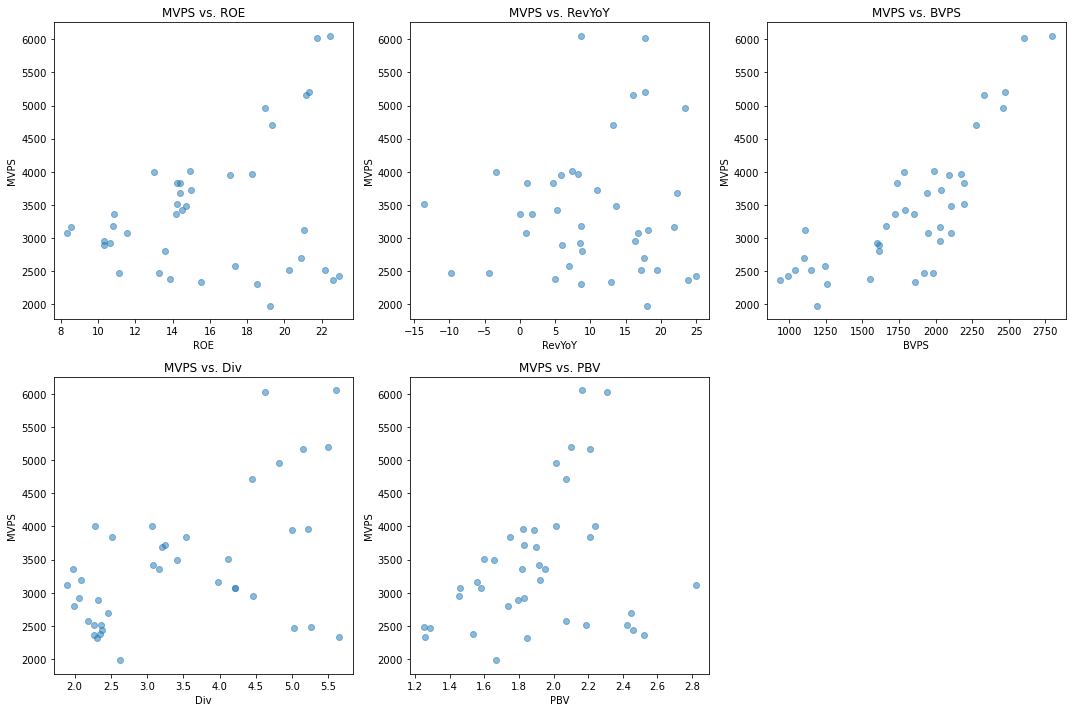

In [45]:
import matplotlib.pyplot as plt
import pandas as pd



fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()


independent_vars = ['ROE', 'RevYoY', 'BVPS', 'Div', 'PBV']

for i, var in enumerate(independent_vars):
    axs[i].scatter(BMRI[var], BMRI['MVPS'], alpha=0.5)
    axs[i].set_title(f'MVPS vs. {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('MVPS')


axs[-1].axis('off')

plt.tight_layout() 
plt.show()

Let's do the multiple regression

In [17]:
y = BMRI['MVPS']
x = smf.add_constant(BMRI[['ROE', 'RevYoY','BVPS', 'Div', 'PBV']])
model = smf.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MVPS   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     529.6
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           3.25e-31
Time:                        18:09:19   Log-Likelihood:                -245.52
No. Observations:                  40   AIC:                             503.0
Df Residuals:                      34   BIC:                             513.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3618.0834    163.915    -22.073      0.0

let's try scatter plot for centered variables

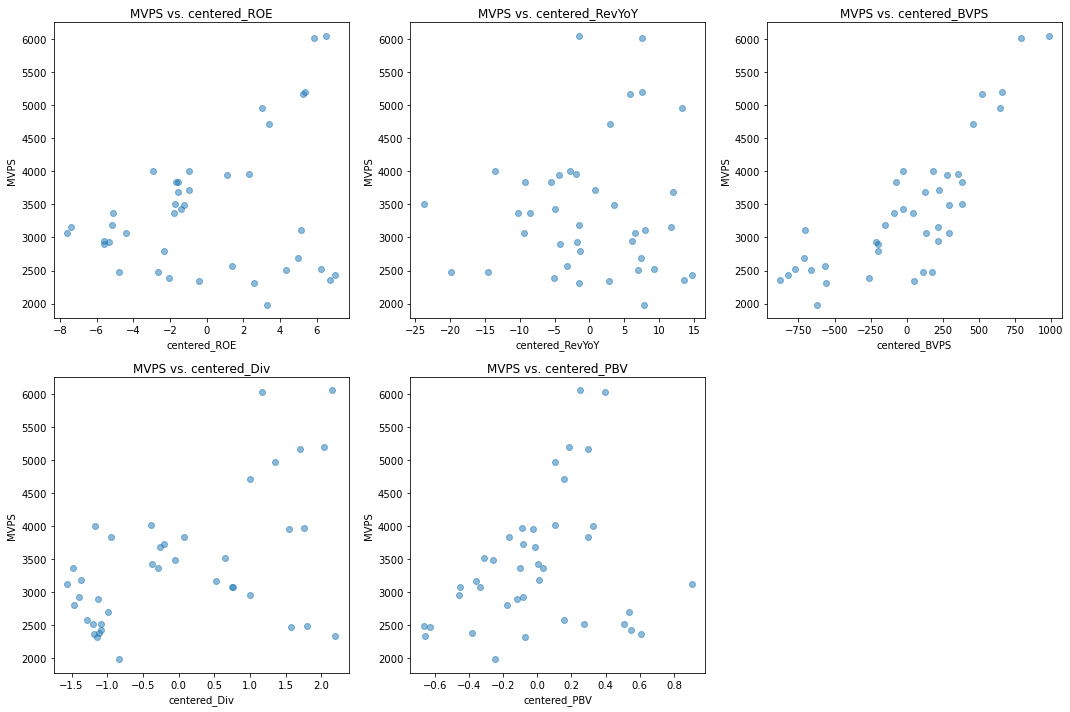

In [48]:
import matplotlib.pyplot as plt
import pandas as pd



centered_independent_vars = ['centered_ROE', 'centered_RevYoY', 'centered_BVPS', 'centered_Div', 'centered_PBV']


fig, axs = plt.subplots(2, 3, figsize=(15, 10))  
axs = axs.flatten() 

for i, var in enumerate(centered_independent_vars):
    axs[i].scatter(BMRI[var], BMRI['MVPS'], alpha=0.5)
    axs[i].set_title(f'MVPS vs. {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('MVPS')


axs[-1].axis('off')

plt.tight_layout()  
plt.show()

we re-do multiple regression with centered variables

In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

BMRI['centered_ROE'] = BMRI['ROE'] - BMRI['ROE'].mean()
BMRI['centered_RevYoY'] = BMRI['RevYoY'] - BMRI['RevYoY'].mean()
BMRI['centered_BVPS'] = BMRI['BVPS'] - BMRI['BVPS'].mean()
BMRI['centered_Div'] = BMRI['Div'] - BMRI['Div'].mean()
BMRI['centered_PBV'] = BMRI['PBV'] - BMRI['PBV'].mean()

y = BMRI['MVPS']
X = sm.add_constant(BMRI[['centered_ROE', 'centered_RevYoY', 'centered_BVPS', 'centered_Div', 'centered_PBV']])


model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MVPS   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     529.6
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           3.25e-31
Time:                        19:42:32   Log-Likelihood:                -245.52
No. Observations:                  40   AIC:                             503.0
Df Residuals:                      34   BIC:                             513.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3413.3750     19.219    1

D:\TrainingML\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


let's test the model

In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

y_all_centered = BMRI['MVPS']
X_all_centered = sm.add_constant(BMRI[['centered_ROE', 'centered_RevYoY', 'centered_BVPS', 'centered_Div', 'centered_PBV']])


model_refitted = sm.OLS(y_all_centered, X_all_centered).fit()


random_predictor_values = {
    'centered_ROE': 3.59, 
    'centered_RevYoY': -8.08,  
    'centered_BVPS': 159.13, 
    'centered_Div': 0.89,  
    'centered_PBV': 0.36  
}


coefficients = model_refitted.params
predicted_mvps_manual = (coefficients['const'] + 
                         coefficients['centered_ROE'] * random_predictor_values['centered_ROE'] + 
                         coefficients['centered_RevYoY'] * random_predictor_values['centered_RevYoY'] + 
                         coefficients['centered_BVPS'] * random_predictor_values['centered_BVPS'] + 
                         coefficients['centered_Div'] * random_predictor_values['centered_Div'] + 
                         coefficients['centered_PBV'] * random_predictor_values['centered_PBV'])

print(f"Predicted MVPS: {predicted_mvps_manual}")

Predicted MVPS: 4290.530362167685


We check for both multicoliearity and heteroskedasticity

In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X_all_centered.columns
vif_data['VIF'] = [variance_inflation_factor(X_all_centered.values, i) for i in range(X_all_centered.shape[1])]

print(vif_data)

           Feature       VIF
0            const  1.000000
1     centered_ROE  3.756917
2  centered_RevYoY  1.392994
3    centered_BVPS  3.459485
4     centered_Div  4.877197
5     centered_PBV  3.784449


In [54]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

residuals = model_refitted.resid
fitted_values = model_refitted.fittedvalues
model_independent_variables = model_refitted.model.exog

bp_test = het_breuschpagan(residuals, model_independent_variables)


bp_stat, bp_pvalue = bp_test[:2]

print(f"Breusch-Pagan Test Statistic: {bp_stat}")
print(f"p-value: {bp_pvalue}")

Breusch-Pagan Test Statistic: 3.342952147486269
p-value: 0.6472724207500997


now lety's visualize our regression with all centered predictors

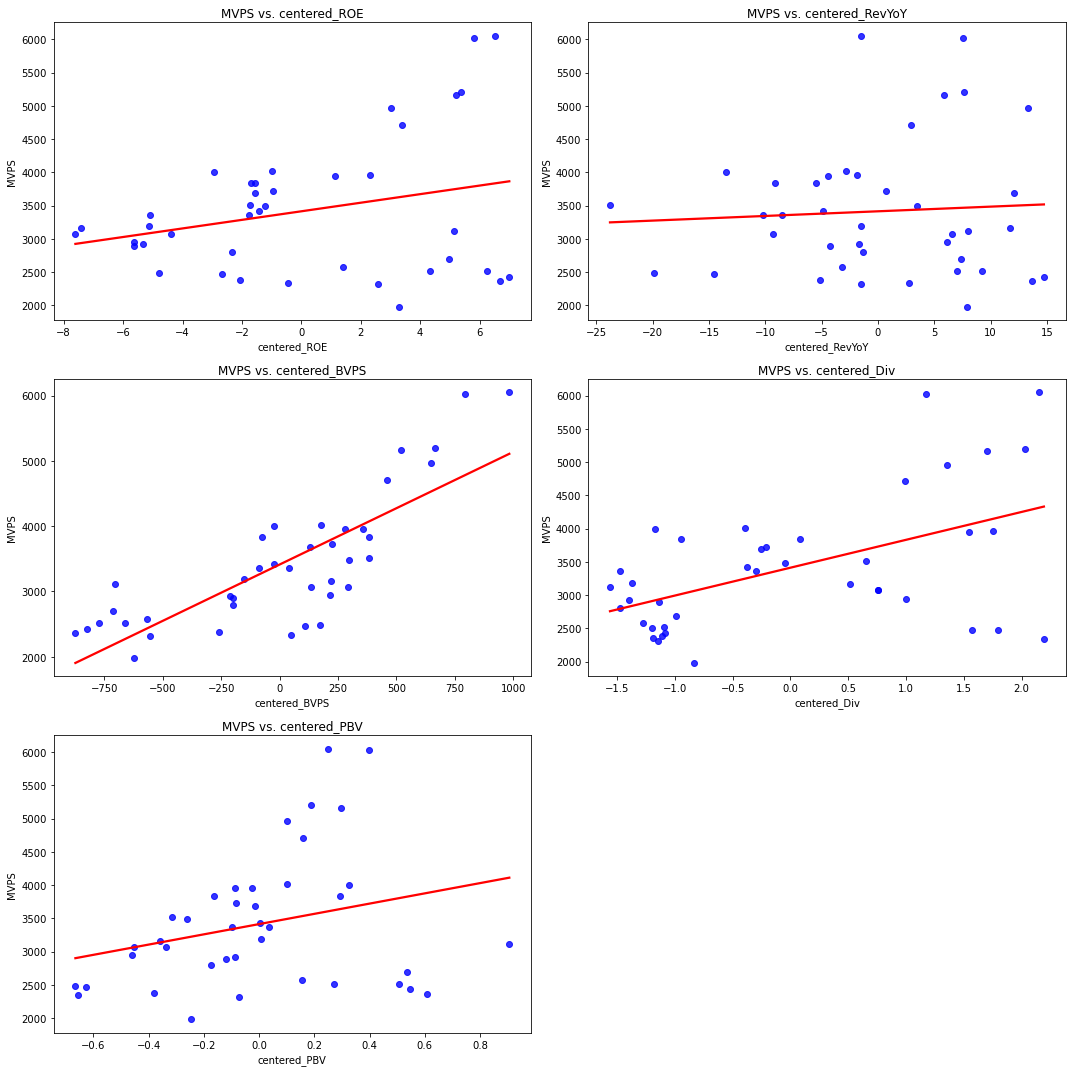

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


centered_independent_vars = ['centered_ROE', 'centered_RevYoY', 'centered_BVPS', 'centered_Div', 'centered_PBV']
dependent_var = 'MVPS'


n = len(centered_independent_vars)
ncols = 2 
nrows = n // ncols + (n % ncols > 0) 


fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axs = axs.flatten()


for i, var in enumerate(centered_independent_vars):
    sns.regplot(x=var, y=dependent_var, data=BMRI, ax=axs[i], ci=None,
                scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    axs[i].set_title(f'{dependent_var} vs. {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel(dependent_var)


for ax in axs[len(centered_independent_vars):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Intepretation = 

Centered ROE (3.59): This value indicates that the Return on Equity (ROE) for the simulated scenario is higher than the average ROE by approximately 3.59 units (after centering). A higher ROE suggests that the company is more efficient at generating profits from its equity, which is generally viewed positively by investors and can contribute to a higher market value per share (MVPS).

Centered RevYoY (-8.08): The negative value suggests that the Year Over Year Revenue (RevYoY) growth for the simulation is lower than the average by about 8.08 units. Lower revenue growth could be a concern for investors as it might indicate slowing business activities or increased competition, potentially negatively impacting the MVPS.

Centered BVPS (159.13): This positive value indicates that the Book Value Per Share (BVPS) is above the average by approximately 159.13 units. A higher BVPS often indicates that a company has more assets relative to its shares, which can be seen as a positive indicator of underlying value, contributing positively to the MVPS.

Centered Div (0.89): The positive value here suggests that the dividend (Div) is higher than the average by about 0.89 units. Higher dividends can be attractive to investors seeking income, potentially increasing the MVPS. However, it's essential to consider that very high dividends could also indicate that the company might not be reinvesting enough profits back into the business for growth.

Centered PBV (0.36): A positive value for the Price to Book Value (PBV) ratio, centered around the mean, indicates that the company's stock might be valued higher by the market relative to its book value by about 0.36 units. A higher PBV ratio can suggest that investors are willing to pay more for each dollar of book value, often due to expectations of future growth, which positively affects the MVPS.

The predicted MVPS of 4293.13, based on the simulated values, suggests that the company is valued relatively highly in the market under these conditions. The higher ROE and BVPS contribute positively to this valuation, indicating efficient profit generation and a strong asset base. However, the lower revenue growth (RevYoY) could be a point of concern, potentially offset by the positive aspects of higher dividends and a higher PBV ratio, which reflect investor confidence and the anticipated future growth. It's crucial to consider that this interpretation is based on a simplified linear model and simulated data, and real-world scenarios might involve more complex dynamics and additional factors.